In [1]:
import os
import numpy as np
import io
import math
import time
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [2]:
train_dir = os.path.join(os.getcwd(), 'splitdata/train')
validation_dir = os.path.join(os.getcwd(), 'splitdata/val')

In [3]:
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/local_mode_setup.sh
# !wget -q https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-script-mode/master/daemon.json    
# !/bin/bash ./local_mode_setup.sh

In [4]:
!pygmentize classification.py

import argparse
import numpy as np
import os
import tensorflow as tf
#from tensorflow.contrib.eager.python import 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

#para prediccion
from tensorflow.keras import backend as K
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard



train_data_gen_args = dict(rescale=1./255,
                    shear_range=0.01,
                    rotation_range = 20,
                    zoom_range=0.2,
                    height_shift_range = 0.2,
                    width_shift_range = 0.2,
                    brightness_range=[0.1, 1.9],
                    horizontal_flip=Tr

In [5]:
import sagemaker
from sagemaker.tensorflow import TensorFlow


model_dir = '/opt/ml/model'
train_instance_type = 'local'
hyperparameters = {'epochs': 1}
local_estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)

In [6]:
inputs = {'train': f'file://{train_dir}','validation': f'file://{validation_dir}'}

local_estimator.fit(inputs)

Creating tmpnsbp21u6_algo-1-2qjna_1 ... 
Attaching to tmpnsbp21u6_algo-1-2qjna_12mdone
algo-1-2qjna_1  | 2020-05-21 17:47:33,782 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-2qjna_1  | 2020-05-21 17:47:33,789 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-2qjna_1  | 2020-05-21 17:47:33,919 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-2qjna_1  | 2020-05-21 17:47:33,935 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-2qjna_1  | 2020-05-21 17:47:33,952 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-2qjna_1  | 2020-05-21 17:47:33,961 sagemaker-containers INFO     Invoking user script
algo-1-2qjna_1  | 
algo-1-2qjna_1  | Training Env:
algo-1-2qjna_1  | 
algo-1-2qjna_1  | {
algo-1-2qjna_1  |     "additional_framework_parameters": {},
algo-1-2qjna_1  |     "channel_input_dirs": {
algo-1-2qjna_1  

algo-1-2qjna_1  | 2020-05-21 17:48:13,324 sagemaker-containers INFO     Reporting training SUCCESS
tmpnsbp21u6_algo-1-2qjna_1 exited with code 0
Aborting on container exit...
===== Job Complete =====


In [10]:
s3_prefix = 'tf-caltech-sample4'

traindata_s3_prefix = '{}/data/train'.format(s3_prefix)
validation_s3_prefix = '{}/data/validation'.format(s3_prefix)


train_s3 = sagemaker.Session().upload_data(path='./splitdata/train/', key_prefix=traindata_s3_prefix)
validation_s3 = sagemaker.Session().upload_data(path='./splitdata/val/', key_prefix=validation_s3_prefix)

inputs = {'train':train_s3,'validation':validation_s3}
print(inputs)


{'train': 's3://sagemaker-us-east-1-452432741922/tf-caltech-sample4/data/train', 'validation': 's3://sagemaker-us-east-1-452432741922/tf-caltech-sample4/data/validation'}


In [11]:
train_instance_type = 'ml.p3.2xlarge'
hyperparameters = {'epochs': 30}

estimator = TensorFlow(
                       entry_point='classification.py',
                       model_dir=model_dir,
                       train_instance_type=train_instance_type,
                       train_instance_count=1,
                       hyperparameters=hyperparameters,
                       role=sagemaker.get_execution_role(),
                       base_job_name='tf-keras-clasif',
                       framework_version='2.0.0',
                       py_version='py3',
                       script_mode=True)


In [12]:
estimator.fit(inputs)

2020-05-21 17:57:40 Starting - Starting the training job...
2020-05-21 17:57:42 Starting - Launching requested ML instances.........
2020-05-21 17:59:25 Starting - Preparing the instances for training......
2020-05-21 18:00:27 Downloading - Downloading input data...
2020-05-21 18:00:58 Training - Downloading the training image...
2020-05-21 18:01:25 Training - Training image download completed. Training in progress.2020-05-21 18:01:29,269 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2020-05-21 18:01:30,680 sagemaker-containers INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "validation": "/opt/ml/input/data/validation",
        "train": "/opt/ml/input/data/train"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "model_dir": "/opt/ml/mo

Train for 20 steps, validate for 3 steps
Epoch 1/30
#015 1/20 [>.............................] - ETA: 2:52 - loss: 1.3863 - accuracy: 0.4375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 51s - loss: 5.7571 - accuracy: 0.3542 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 27s - loss: 5.3375 - accuracy: 0.3125#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:33 - loss: 0.1051 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.3076 - accuracy: 0.8542 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.3961 - accuracy: 0.8375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:34 - loss: 0.3447 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.2601 - accuracy: 0.9375 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.2406 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:35 - loss: 0.5232 - accuracy: 0.8125#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.2320 - accuracy: 0.9167 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 6/20 [========>.....................] - ETA: 11s - loss: 0.1868 - accuracy: 0.9286#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:34 - loss: 0.1432 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.1871 - accuracy: 0.9167 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.2001 - accuracy: 0.9000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:35 - loss: 0.4562 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.2563 - accuracy: 0.9167 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.2654 - accuracy: 0.9250#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:35 - loss: 0.3801 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 4/20 [=====>........................] - ETA: 20s - loss: 0.5489 - accuracy: 0.8462 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 6/20 [========>.....................] - ETA: 12s - loss: 0.4680 - accuracy: 0.8690#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:35 - loss: 0.0140 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.1025 - accuracy: 0.9722 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.1147 - accuracy: 0.9706#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:35 - loss: 0.6681 - accuracy: 0.6875#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.5241 - accuracy: 0.8333 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.4179 - accuracy: 0.8625#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:32 - loss: 0.3448 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 27s - loss: 0.2707 - accuracy: 0.8958 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 6/20 [========>.....................] - ETA: 11s - loss: 0.2016 - accuracy: 0.9286#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:34 - loss: 0.1048 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 3/20 [===>..........................] - ETA: 28s - loss: 0.0506 - accuracy: 0.9792 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 5/20 [======>.......................] - ETA: 15s - loss: 0.0731 - accuracy: 0.9750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

#015 1/20 [>.............................] - ETA: 1:34 - loss: 0.0655 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 4/20 [=====>........................] - ETA: 20s - loss: 0.0833 - accuracy: 0.9615 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 6/20 [========>.....................] - ETA: 11s - loss: 0.2660 - accuracy: 0.9048#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#

## Crear el Estimador

Puedo volver en cualquier momento y estimar a partir del training job

In [13]:
estimator

In [14]:
predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

-----------!

## Model Evaluation

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [56]:
train_data_gen_args = dict(rescale=1./255)

data_gen_args = dict(target_size=(224, 224),
        batch_size=16,
        shuffle=True,
        #color_mode='grayscale',
        class_mode='categorical')

In [57]:
train_datagen = ImageDataGenerator(**train_data_gen_args)

In [58]:
test_generator = train_datagen.flow_from_directory('splitdata/test/', **data_gen_args)

Found 22 images belonging to 4 classes.


In [60]:
number_of_examples = 22
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * data_gen_args['batch_size'])) 

test_labels = []
predictions = []
for i in range(0,int(number_of_generator_calls)):
    instances = test_generator[i][0]
    print(instances.shape)
    for instance in instances:
        array = instance.reshape((1,) + instance.shape)
        payload = {
          'instances': array.tolist()
        }
        resp = predictor.predict(payload)['predictions']
        predictions.append(np.array(resp))
        
    test_labels.extend(np.array(test_generator[i][1]))

(16, 224, 224, 3)
(6, 224, 224, 3)


In [61]:
np.array(predictions).shape

(22, 1, 4)

In [63]:
predictions = np.array(predictions).reshape(22,4)

In [64]:
np.argmax(predictions,axis=1)

array([3, 2, 2, 1, 1, 1, 3, 1, 0, 1, 0, 0, 3, 1, 1, 3, 2, 0, 2, 0, 3, 2])

In [65]:
predictions = np.argmax(predictions,axis=1)

In [66]:
labels = np.argmax(np.array(test_labels),axis=1)

In [67]:
accuracy_score(labels,predictions)

1.0

In [68]:
test_generator.class_indices

{'078.fried-egg': 0,
 '120.joy-stick': 1,
 '130.license-plate': 2,
 '177.saturn': 3}

In [69]:
classes = list(test_generator.class_indices.keys())

In [70]:
classes

['078.fried-egg', '120.joy-stick', '130.license-plate', '177.saturn']

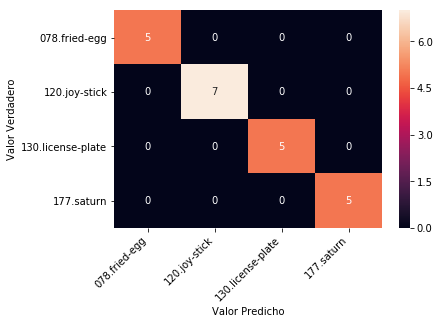

In [71]:
df_cm = confusion_matrix(labels,predictions,labels=np.unique(labels))

heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(classes, rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(classes, rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');


## Boto3

(Real time predictor para Lambda)

In [72]:
import boto3
import json
client = boto3.client('sagemaker-runtime')

In [73]:
type(payload)

dict

In [75]:
endpoint_name = "tf-keras-clasif-2020-05-21-17-57-39-715"                                       # Your endpoint name.
content_type = "application/json"                                        # The MIME type of the input data in the request body.
json_payload = json.dumps(payload)

In [76]:
response = client.invoke_endpoint(
    EndpointName=endpoint_name, 
    ContentType=content_type,
    Body=json_payload
    )


In [77]:
eval(response['Body'].read())


{'predictions': [[0.000163963123, 2.93923244e-06, 0.999833, 5.84314819e-10]]}